In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read dataset using
df = pd.read_csv("/content/gdrive/MyDrive/blood_glucose/diabetes_prediction_dataset.csv")
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# description  about dataset
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [ ]:
# check null values in dataset
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Dataset Preprocessing

In [ ]:
# Apply label encoder for output columns
le = LabelEncoder()
le.fit(df["smoking_history"])
pickle.dump(le,open("/content/gdrive/MyDrive/blood_glucose/le_weight.p","wb"))
df["smoking_history"] = le.transform(df["smoking_history"])

In [ ]:
# Apply mapping to gender columns
map_col = {"Female":0,"Male":1}
df["gender"] =  df["gender"].map(map_col)


In [ ]:
# Move output columns as a last column
first_column = df.pop("blood_glucose_level")
df.insert(8,"blood_glucose_level",first_column)

# Dataset Visulization

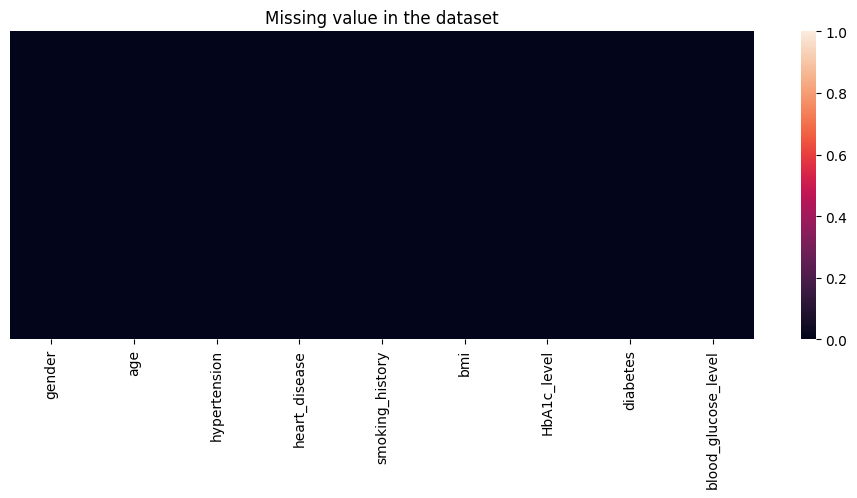

In [ ]:
# Check missing value from Data Balancing
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(data=df.isnull(), yticklabels=False)
plt.title('Missing value in the dataset');

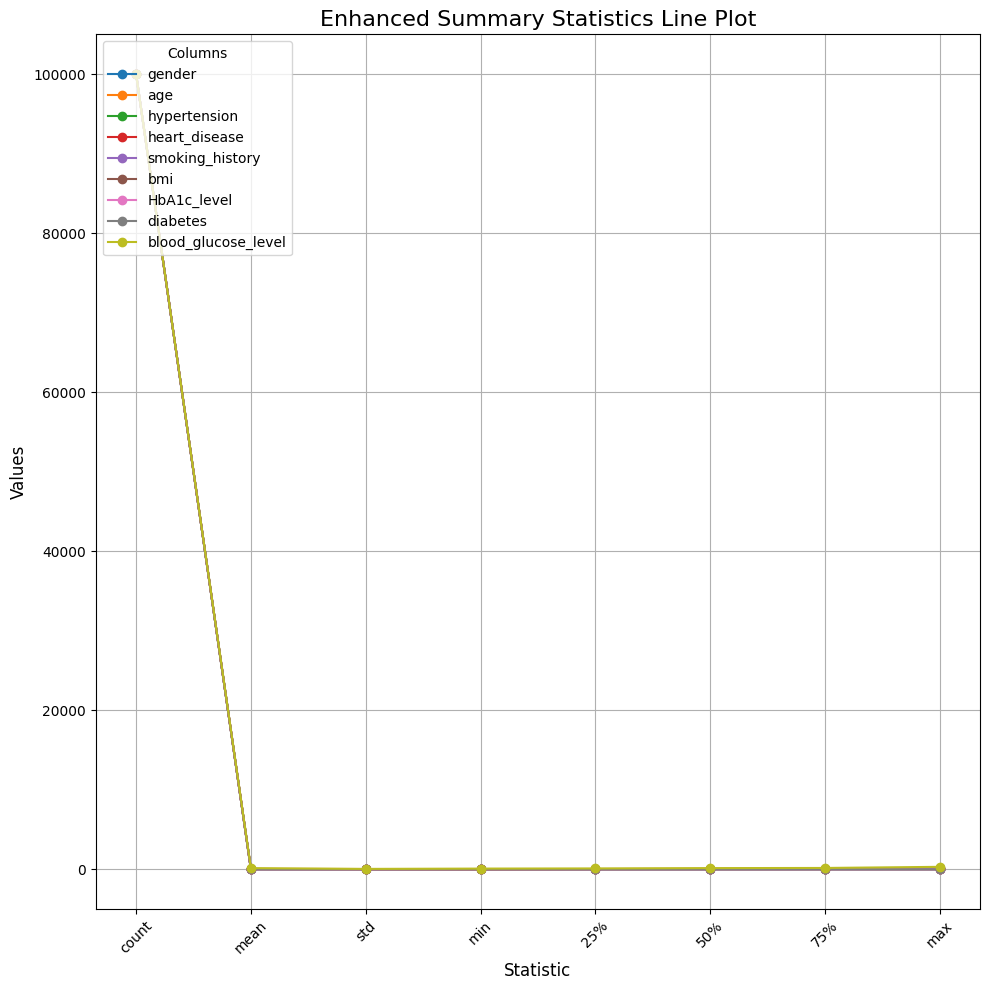

In [ ]:
# Create a DataFrame containing summary statistics
summary_stats = df.describe()
summary_stats_df = pd.DataFrame(summary_stats, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], columns=df.columns)

# Enhance the line plot
plt.figure(figsize=(10,10))

for column in summary_stats_df.columns:
    plt.plot(summary_stats_df.index, summary_stats_df[column], marker='o', label=column)

plt.title('Enhanced Summary Statistics Line Plot', fontsize=16)
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Columns', loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


<Axes: >

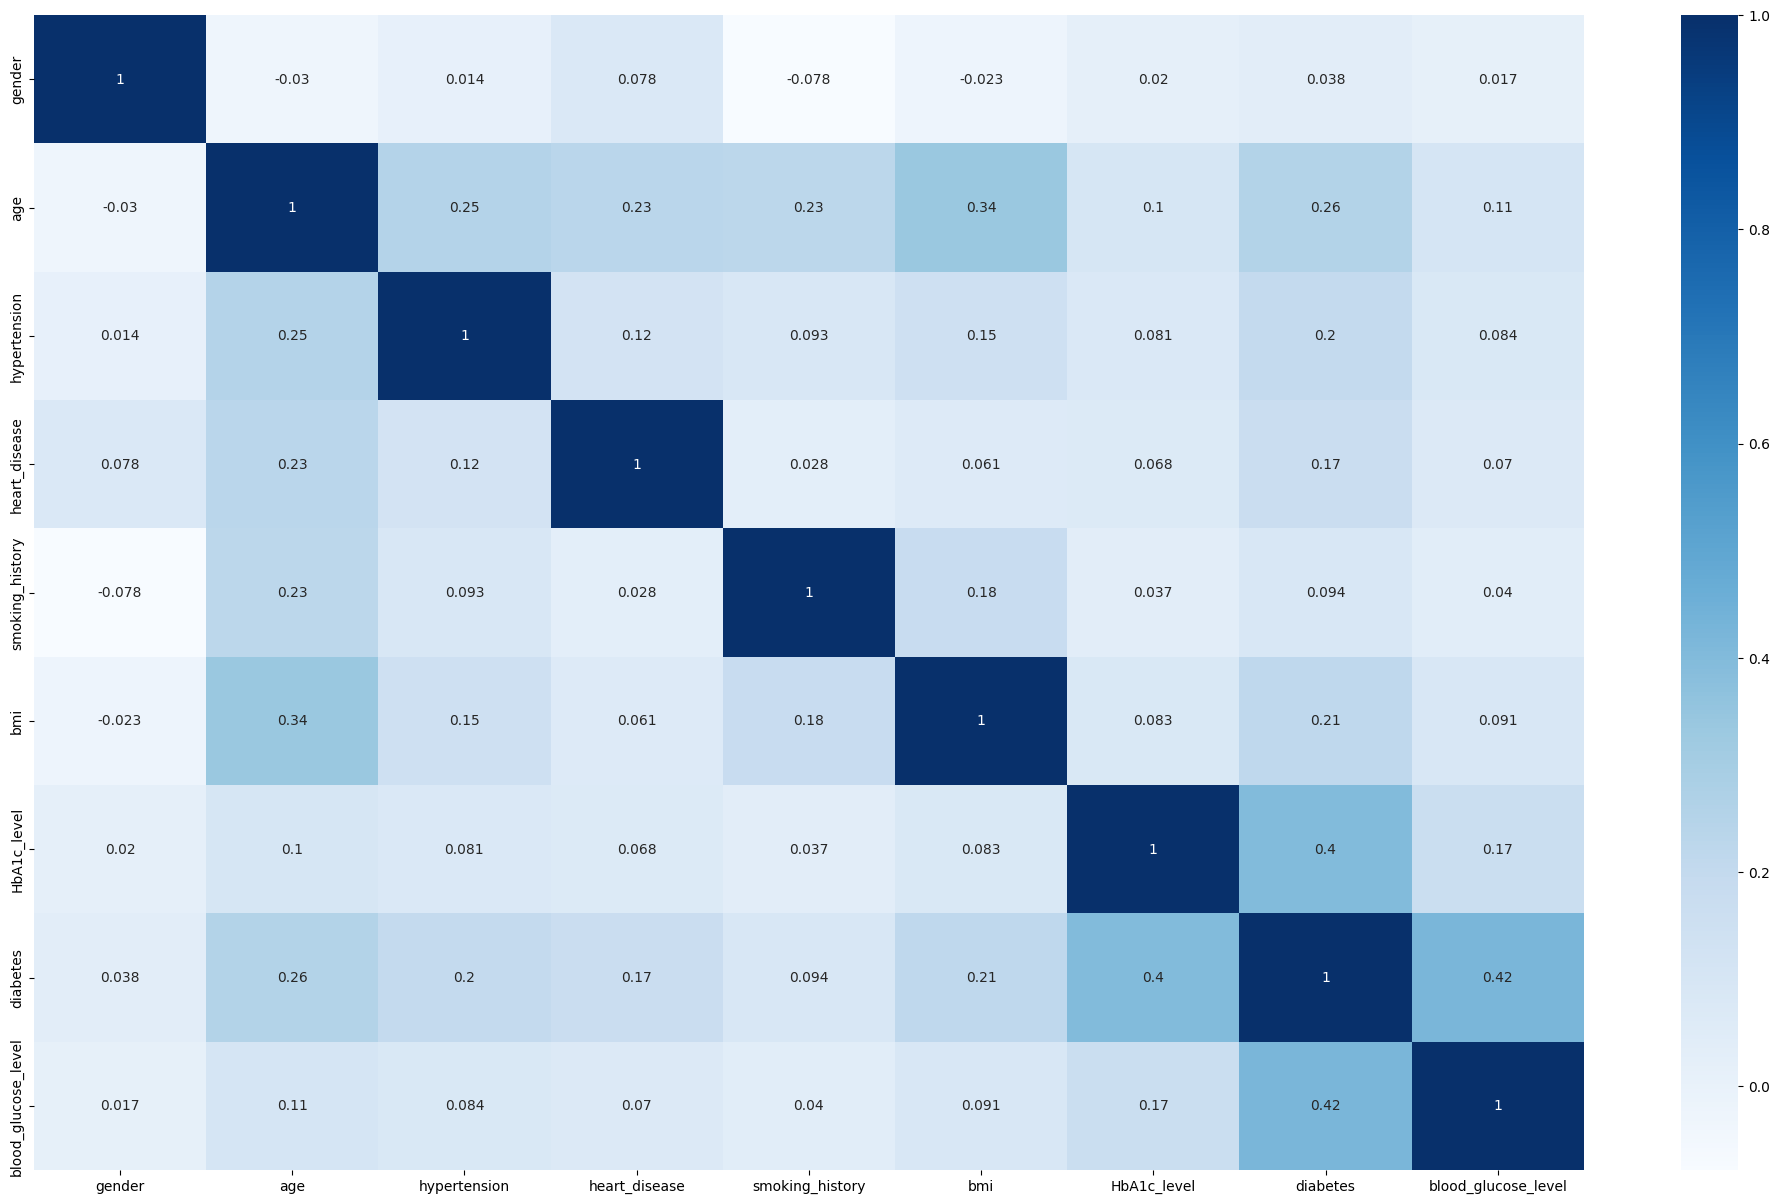

In [ ]:
# get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corrmat,annot=True,cmap="Blues")

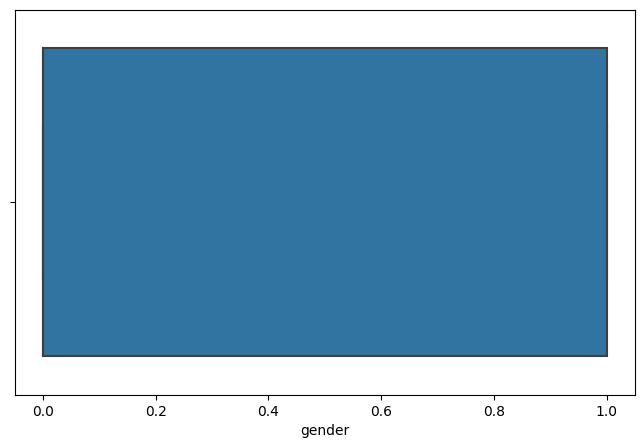

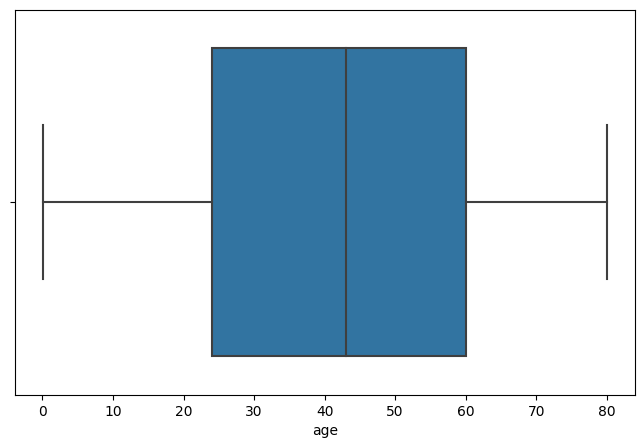

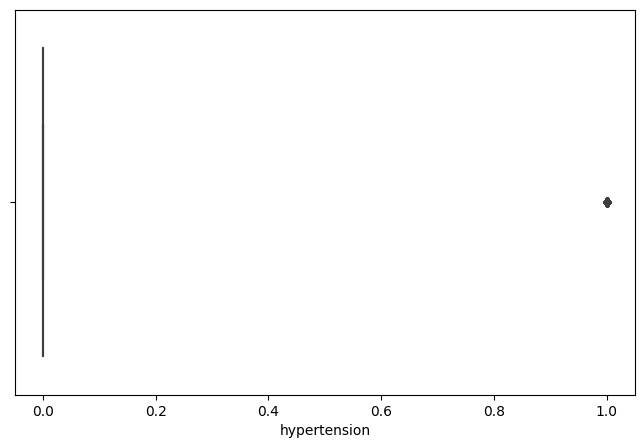

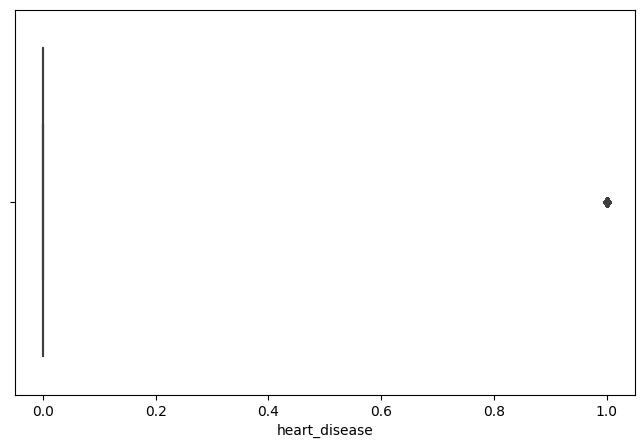

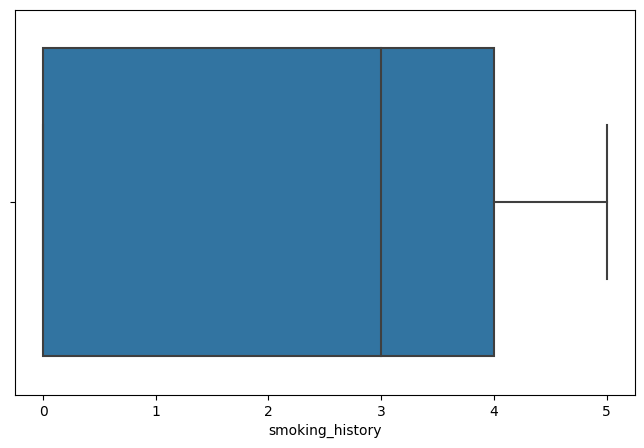

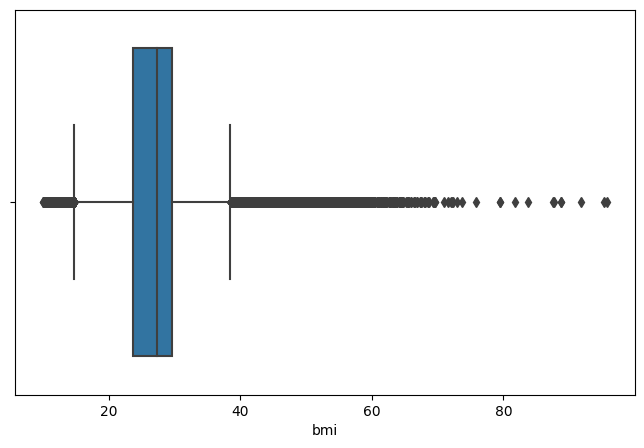

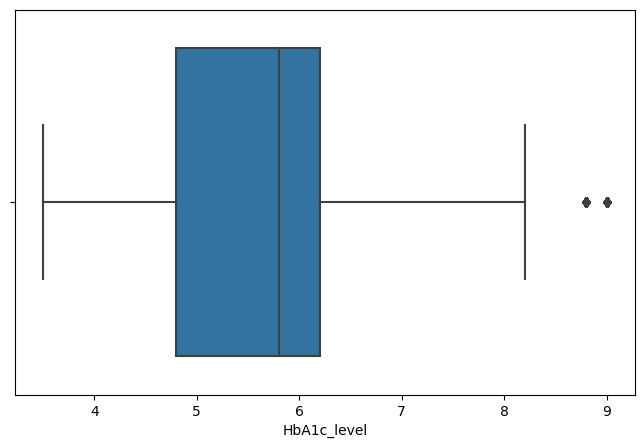

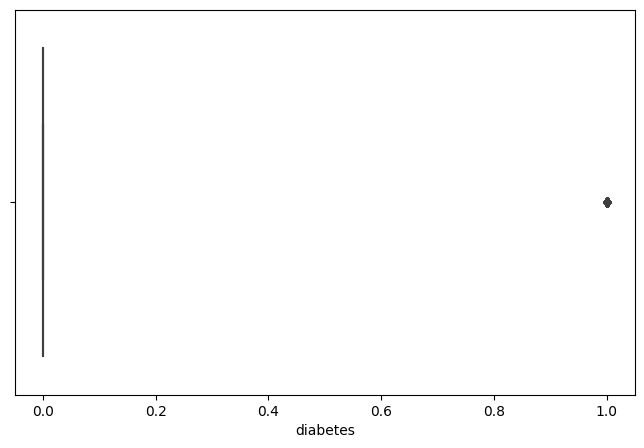

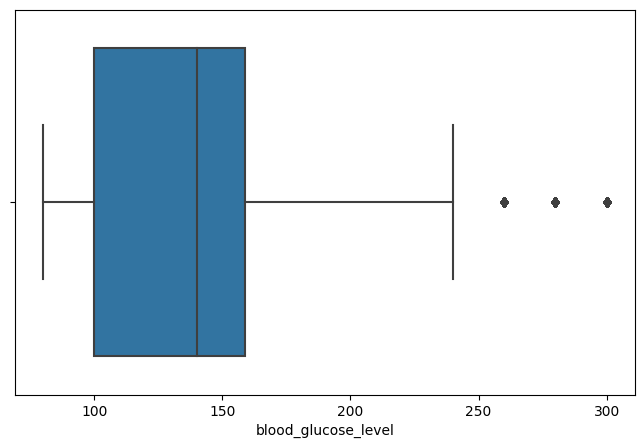

In [ ]:
# Boxplots of all the feature data
for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):
        fig,ax = plt.subplots(figsize=(8,5))
        sns.boxplot(data=df, x=column)

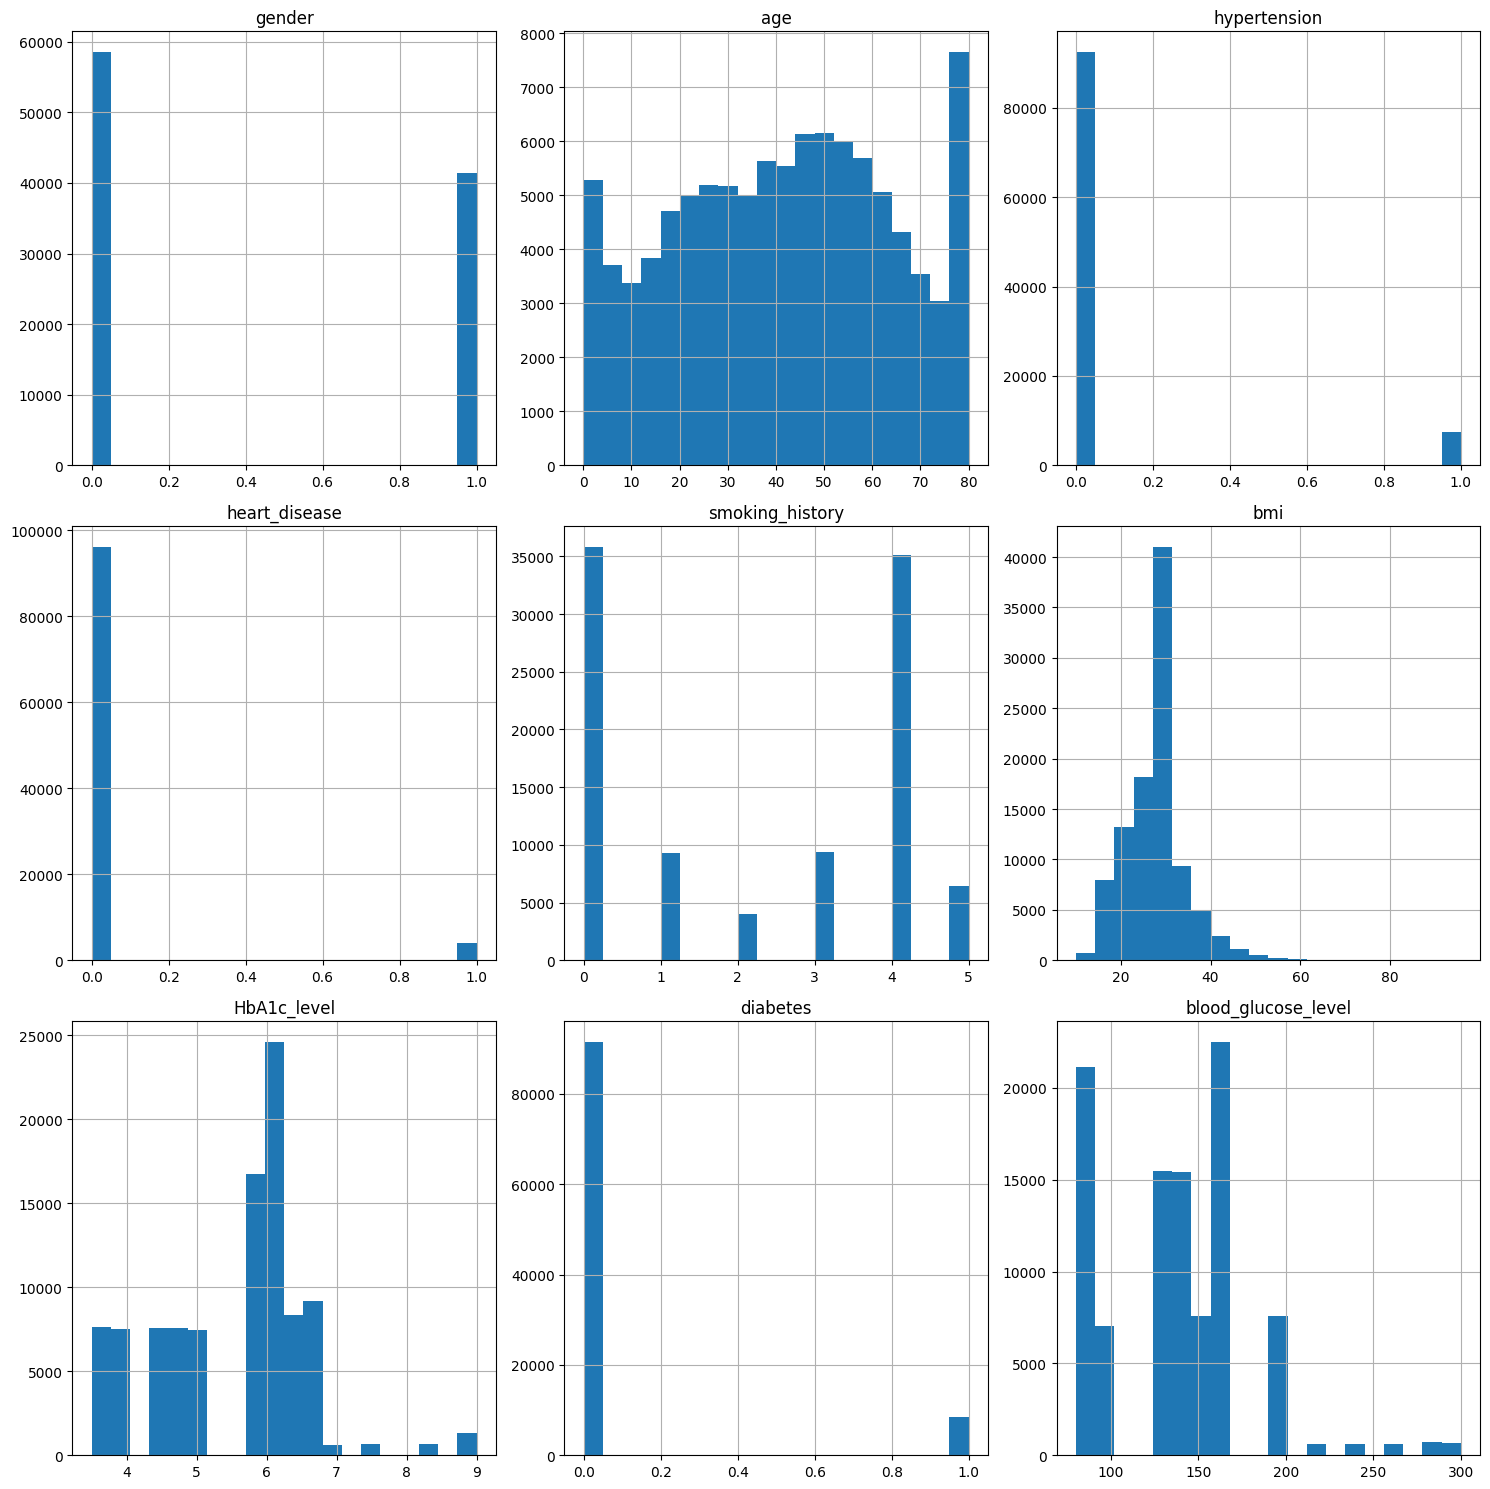

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(figsize=(15, 15), bins=20)
plt.tight_layout()
plt.show()


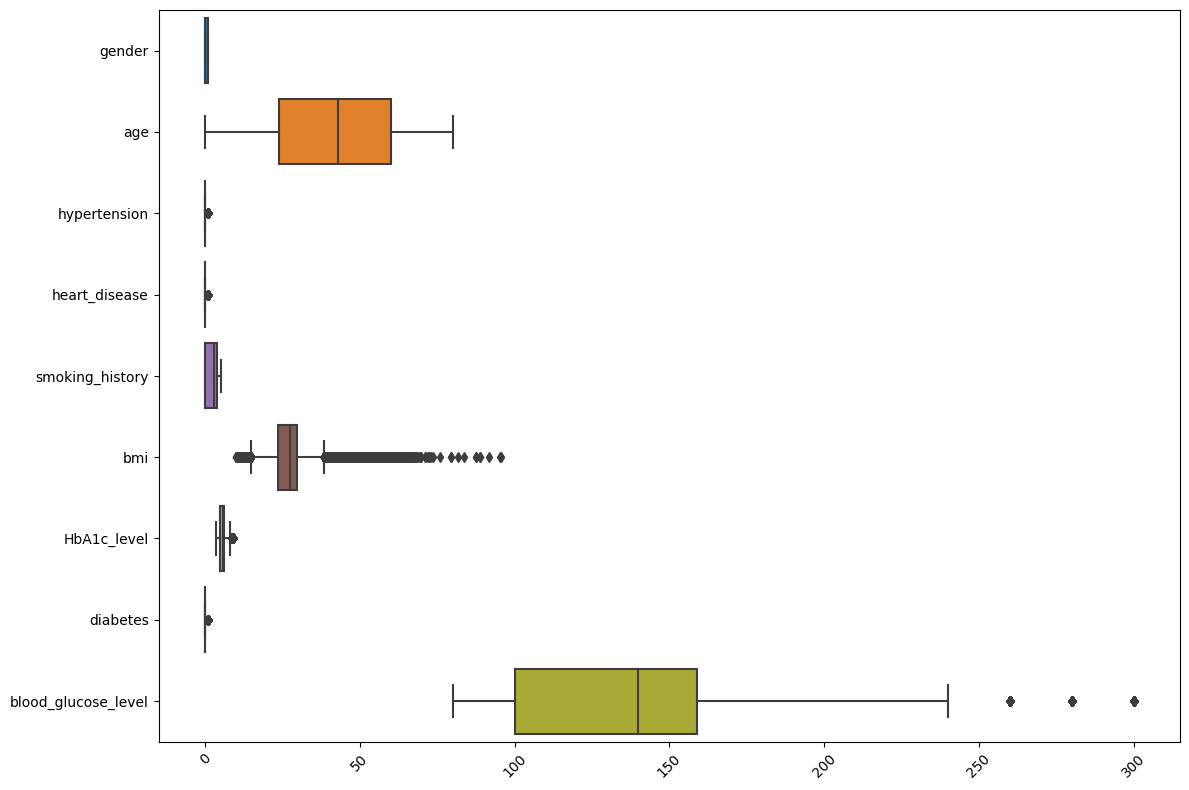

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


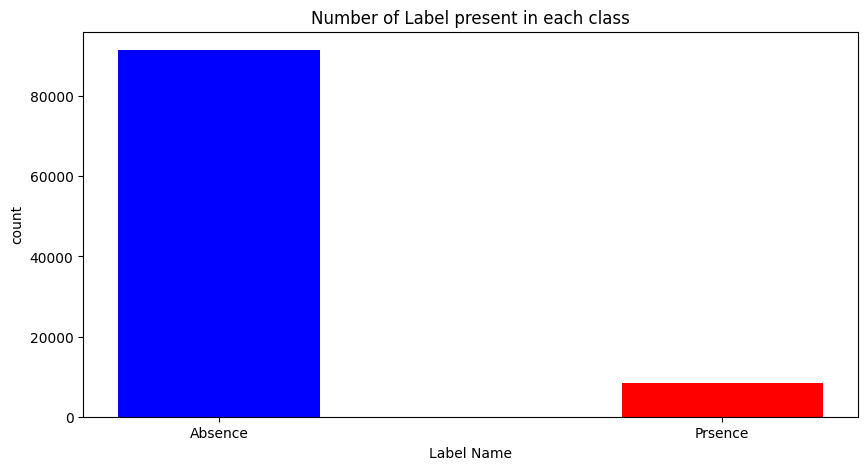

In [ ]:
# After applying smote the dataset has been balanced
class_data = df['diabetes'].value_counts()
# creating the dataset
data = class_data.values

fig = plt.figure(figsize = (10, 5))

labels = ["Absence","Prsence"]
# creating the bar plot
plt.bar(labels,data , color=["blue","red"],
        width = 0.4)

plt.xlabel("Label Name")
plt.ylabel("count")
plt.title("Number of Label present in each class")
plt.show()

Correlation Scores with Target Variable:
blood_glucose_level    1.000000
diabetes               0.419558
HbA1c_level            0.166733
age                    0.110672
bmi                    0.091261
hypertension           0.084429
heart_disease          0.070066
smoking_history        0.040219
gender                 0.017196
Name: blood_glucose_level, dtype: float64


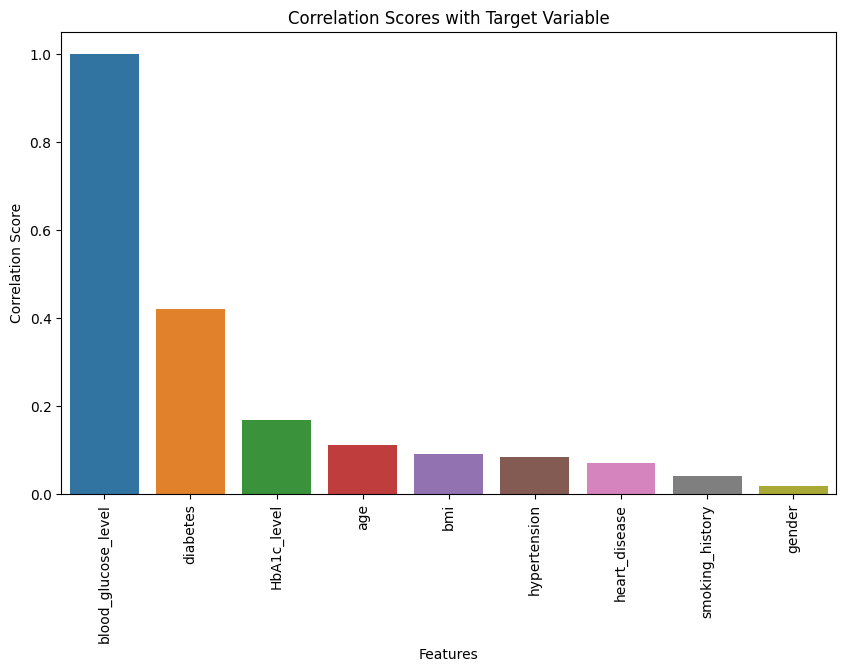

In [ ]:
# Compute the correlation matrix between features and the target variable
correlation_matrix = df.corr()

# Extract the correlation scores of each feature with the target variable
target_correlation_scores = correlation_matrix['blood_glucose_level']

# Sort the features based on their correlation scores (absolute values) in descending order
sorted_features = target_correlation_scores.abs().sort_values(ascending=False)

# Print the correlation scores
print("Correlation Scores with Target Variable:")
print(sorted_features)

# Plot a bar plot to visualize the correlation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.index, y=sorted_features.values)
plt.title('Correlation Scores with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Score')
plt.xticks(rotation=90)
plt.show()



# Dataset Normalization

In [ ]:
# Seperate output columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
pickle.dump(scaler,open("/content/gdrive/MyDrive/blood_glucose/scaler_weight.p","wb"))
scaled_data = scaler.transform(X)

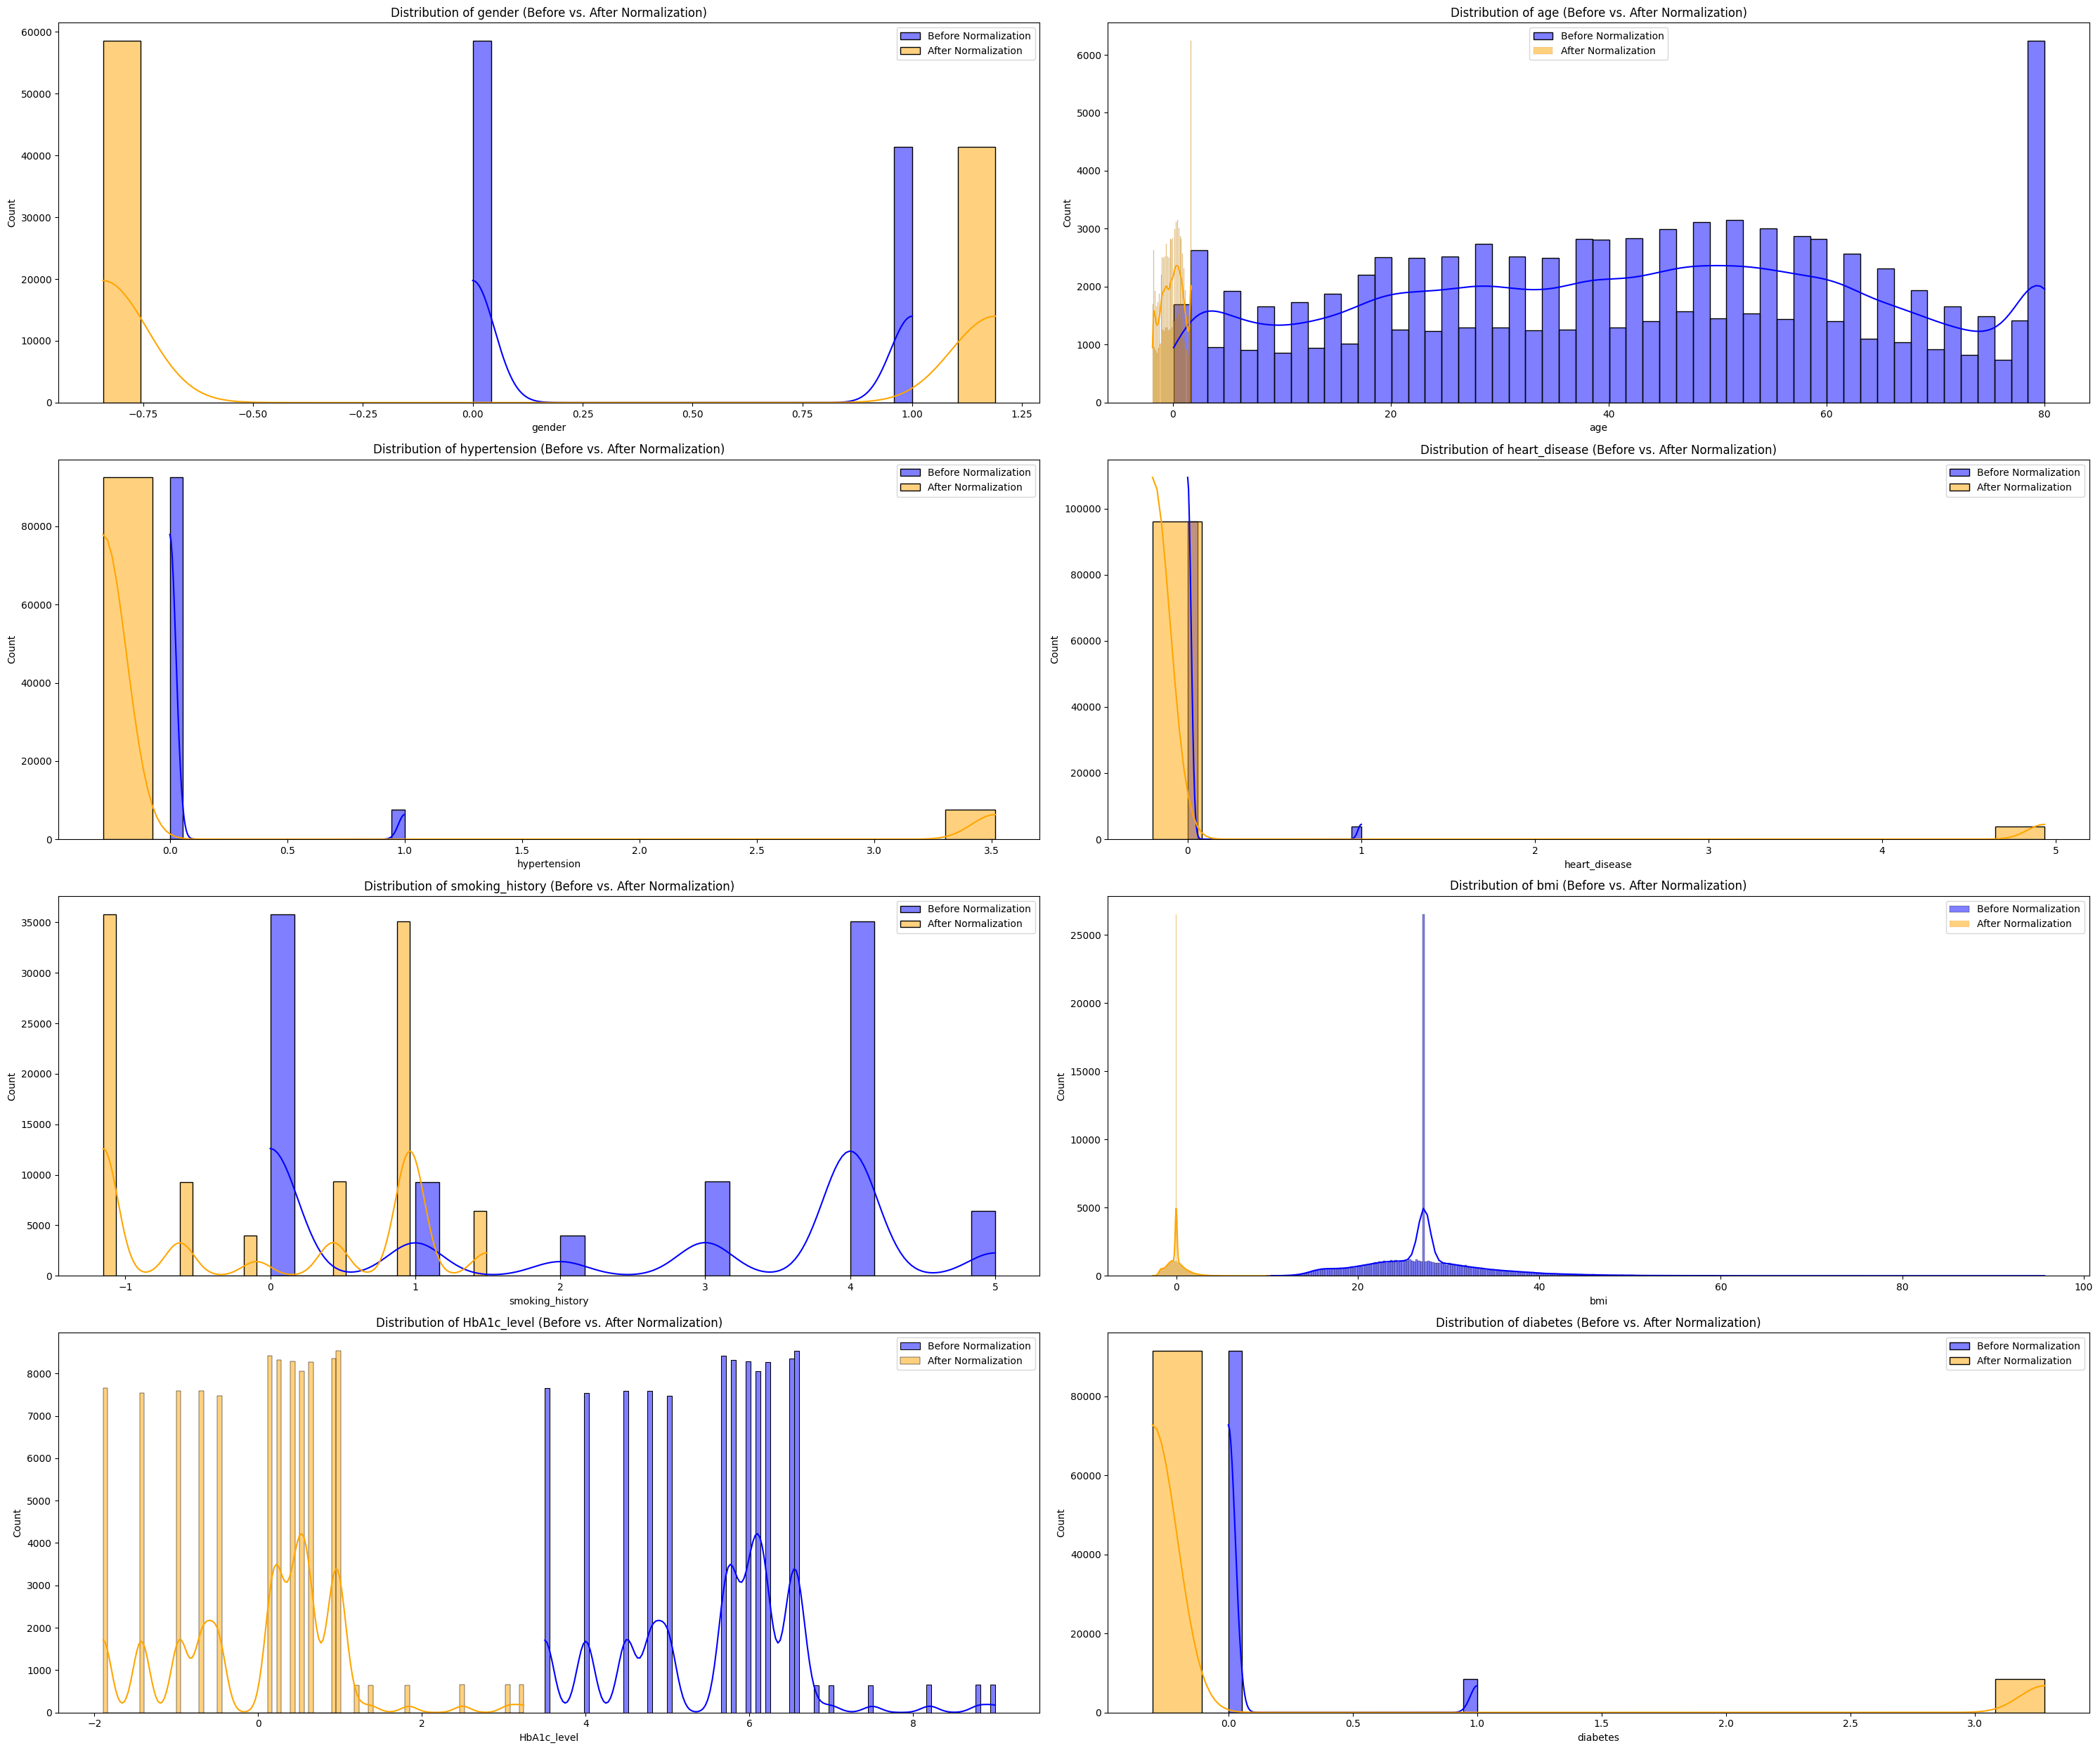

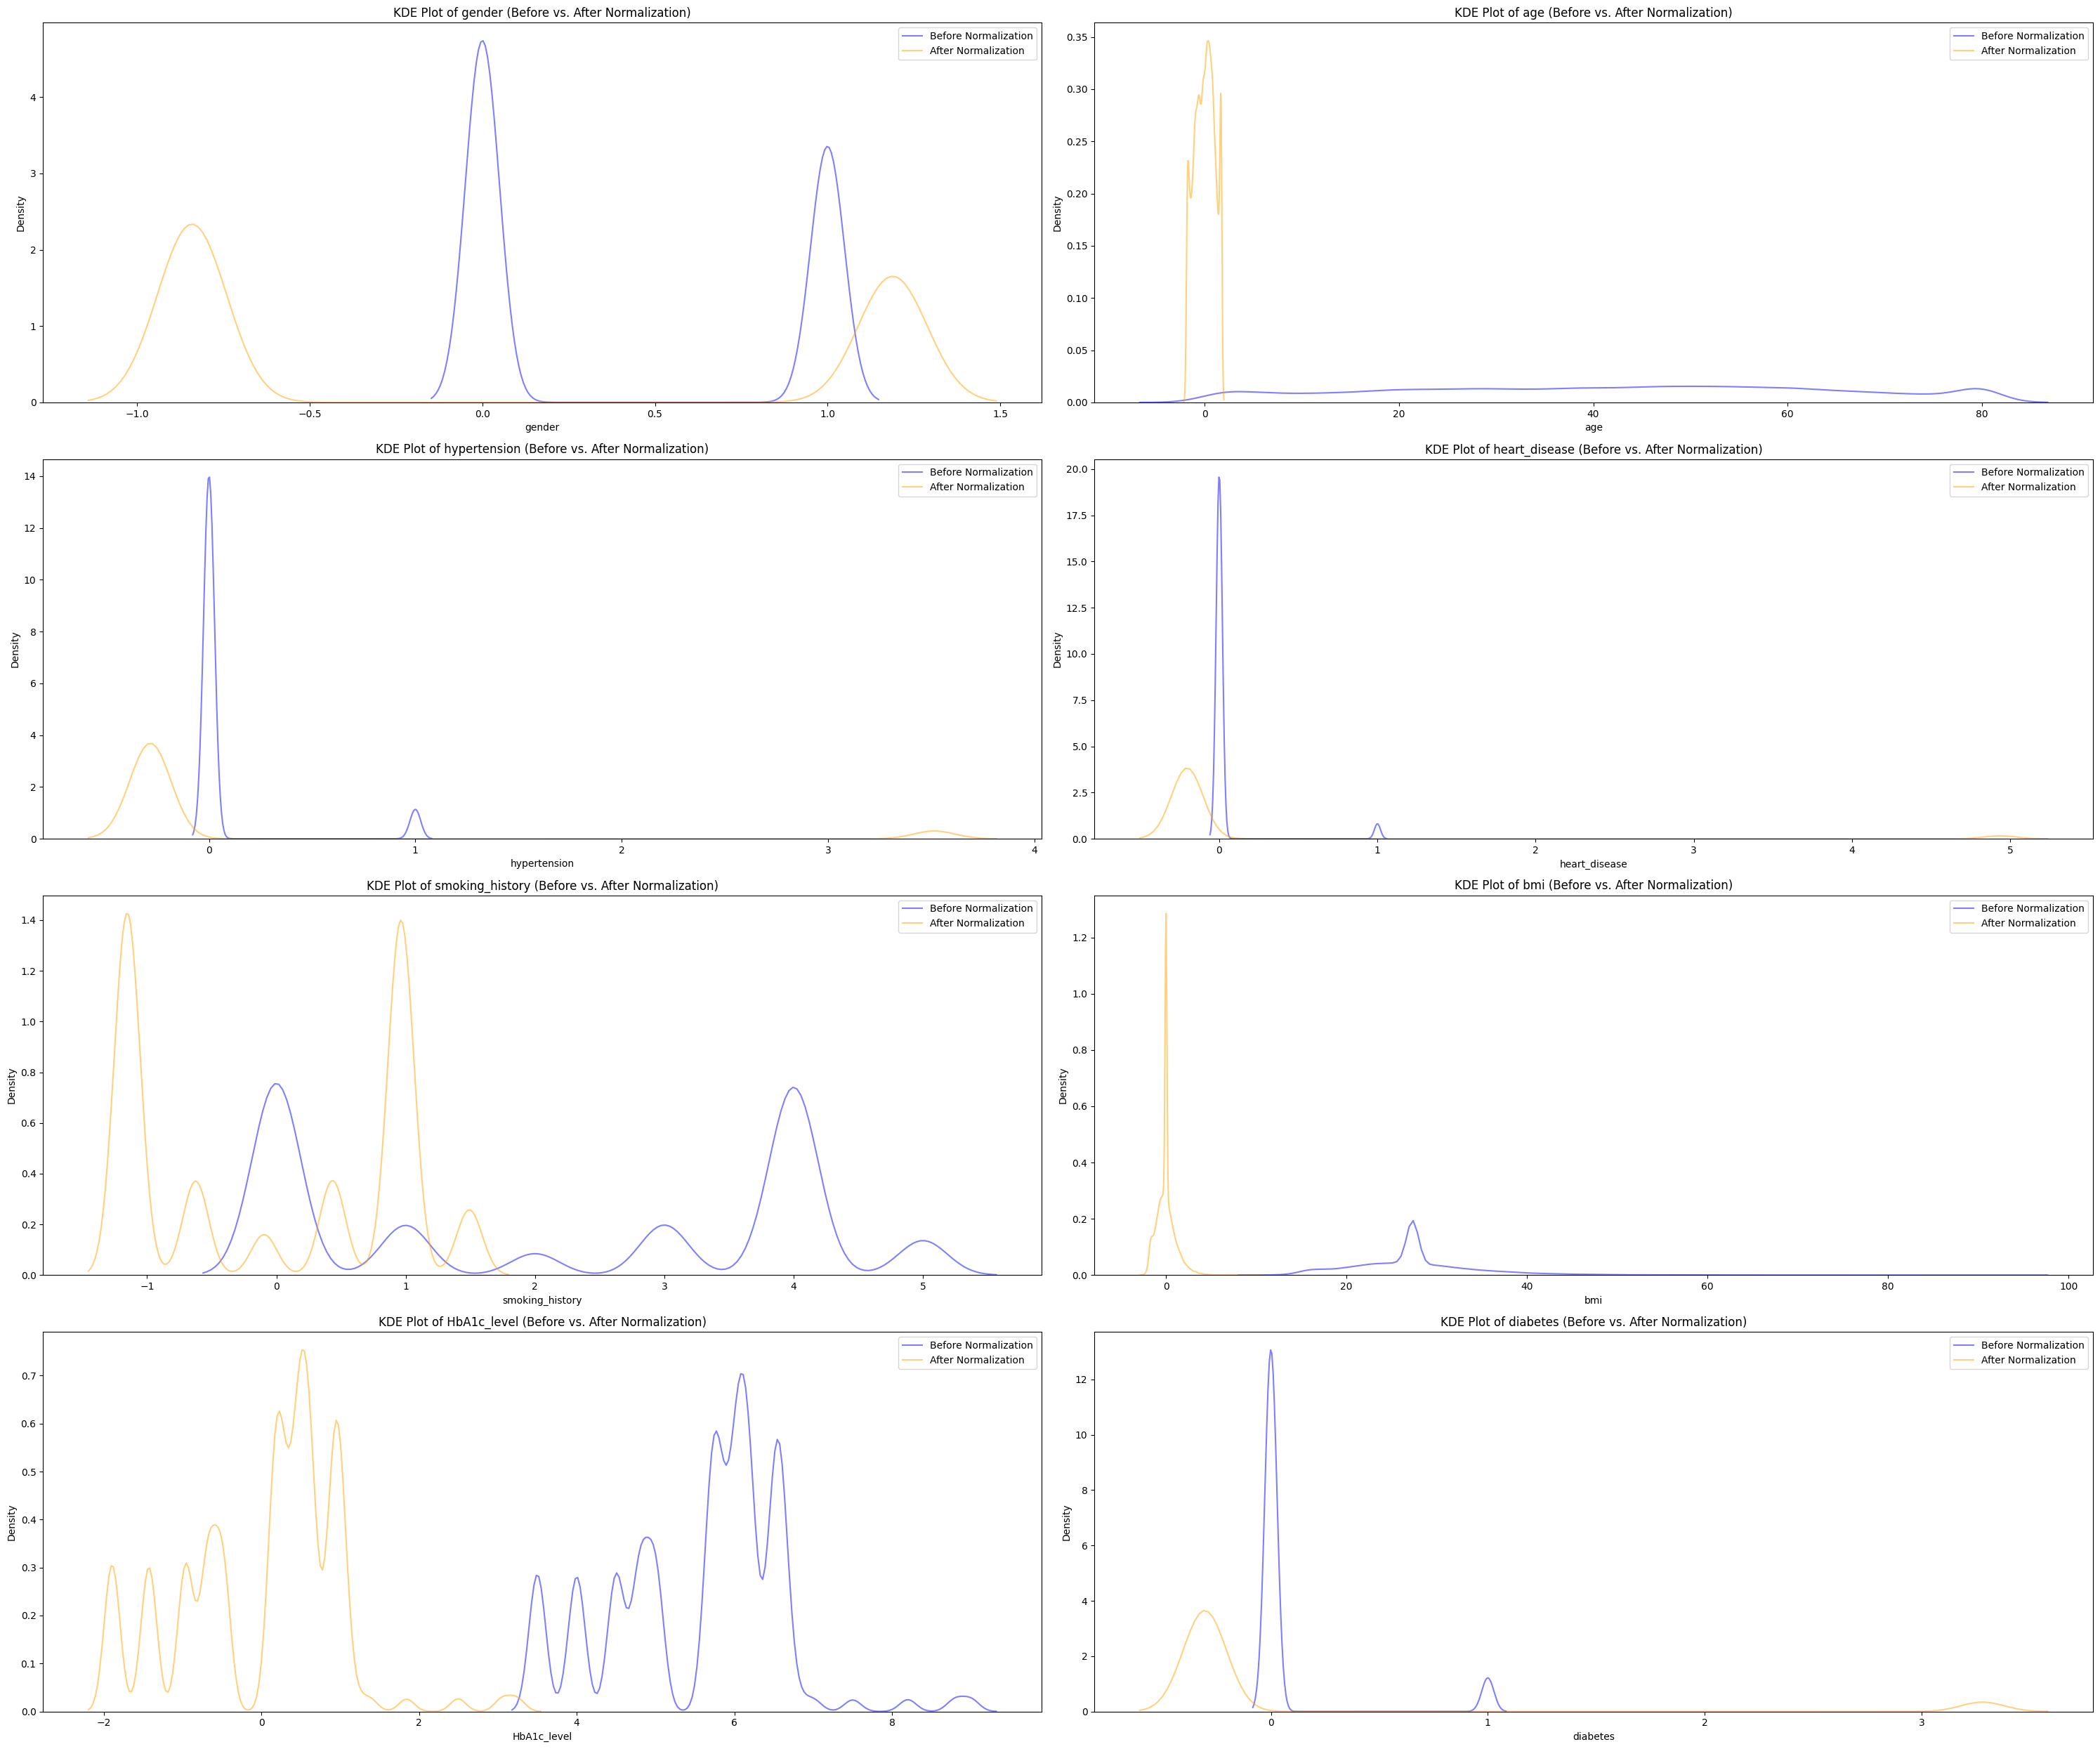

In [ ]:
def plot_distributions_before_after(data, scaled_data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Calculate the number of subplot rows

    plt.figure(figsize=(30, 25))

    for i, col in enumerate(columns):
        plt.subplot(num_rows, 2, i + 1)
        sns.histplot(data[col], kde=True, label='Before Normalization', color='blue', alpha=0.5)
        sns.histplot(scaled_data.iloc[:, i], kde=True, label='After Normalization', color='orange', alpha=0.5)
        plt.title(f'Distribution of {col} (Before vs. After Normalization)')
        plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(30, 25))

    for i, col in enumerate(columns):
        plt.subplot(num_rows, 2, i + 1)
        sns.kdeplot(data[col], label='Before Normalization', color='blue', alpha=0.5)
        sns.kdeplot(scaled_data.iloc[:, i], label='After Normalization', color='orange', alpha=0.5)
        plt.title(f'KDE Plot of {col} (Before vs. After Normalization)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data and column names
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
plot_distributions_before_after(X, scaled_df, X.columns)


In [ ]:
# dataset split into training and testing ,75 % for training and remaining 25% for testing
X_train,X_test,y_train,y_test = train_test_split(scaled_data[:10000],y[:10000],test_size = 0.2 , random_state = 42)

In [ ]:
print('X_train',X_train.shape,'X_test',X_test.shape,'y_train',y_train.shape,'y_test',y_test.shape)

X_train (8000, 8) X_test (2000, 8) y_train (8000,) y_test (2000,)


In [ ]:
train_val_data = {'total data':[len(X_train),len(X_test),len(y_train),len(y_test)]}
pd.DataFrame.from_dict(train_val_data, orient='index',columns=["X_train","X_test","y_train","y_test"])

X_train  X_test  y_train  y_test
total data     8000    2000     8000    2000

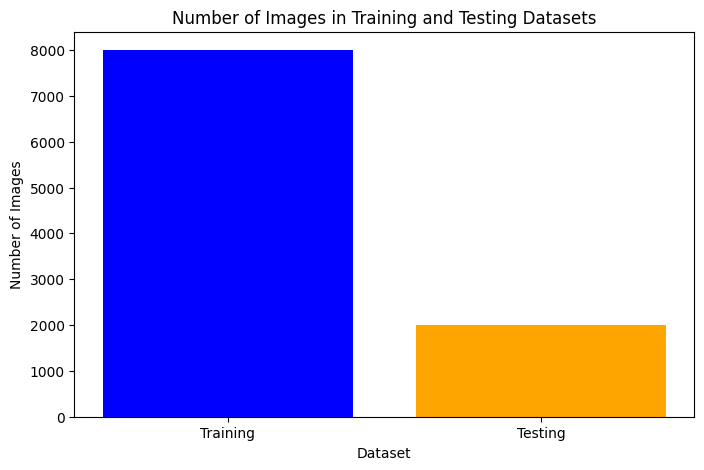

In [ ]:
# Calculate the number of images for training and testing
num_train_images = len(X_train)
num_test_images = len(X_test)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [num_train_images, num_test_images], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Number of Images in Training and Testing Datasets')
plt.show()


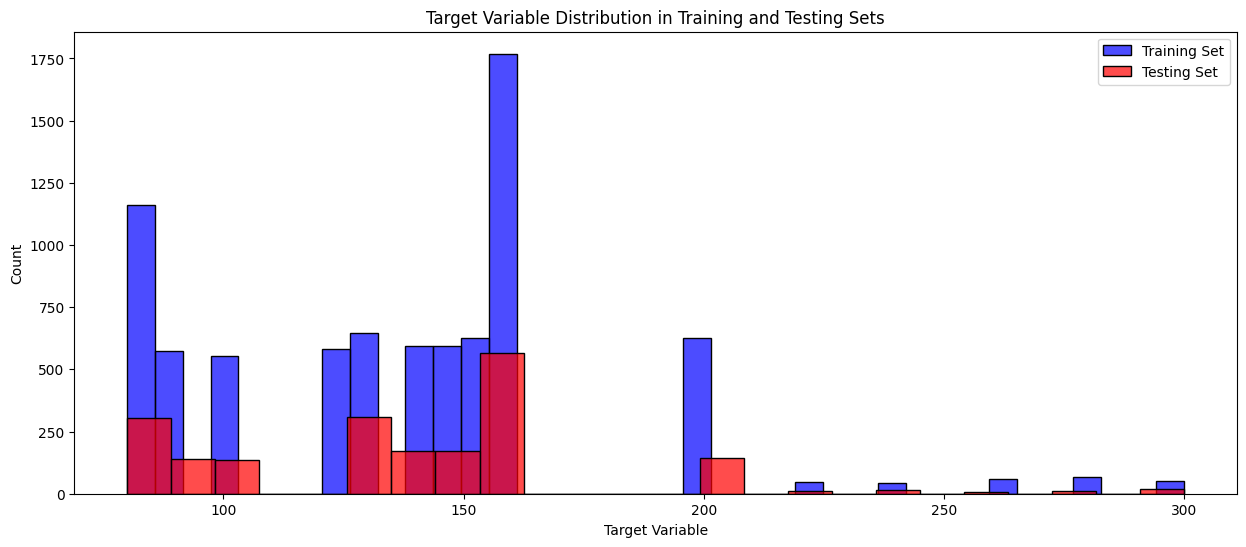

In [ ]:
# Convert y_train and y_test back to DataFrames for visualization
train_data = pd.DataFrame({'Target': y_train})
test_data = pd.DataFrame({'Target': y_test})

# Plot a histogram to visualize the target variable distribution in the training and testing sets
plt.figure(figsize=(15, 6))
sns.histplot(train_data['Target'], color='blue', alpha=0.7, label='Training Set')
sns.histplot(test_data['Target'], color='red', alpha=0.7, label='Testing Set')
plt.title('Target Variable Distribution in Training and Testing Sets')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.legend()
plt.show()

# Training using Fcnn with integration of NeuraOptiNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten, Input
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define your model creation function with additional GRU and Dense layers
def fcnn_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    reshaped_input = Reshape((1, input_dim))(input_layer)  # Reshape the input to 3D (batch_size, timesteps, input_features)

    gru_layer1 = GRU(128, return_sequences=True)(reshaped_input)  # First GRU layer
    gru_layer2 = GRU(64, return_sequences=True)(gru_layer1)  # Second GRU layer
    gru_layer3 = GRU(32, return_sequences=True)(gru_layer2)  # Third GRU layer

    flattened = Flatten()(gru_layer3)  # Flatten the output for further dense layers

    dense_layer1 = Dense(32, activation='relu')(flattened)  # First Dense layer
    dense_layer2 = Dense(16, activation='relu')(dense_layer1)  # Second Dense layer

    output_layer = Dense(1, activation='linear')(dense_layer2)  # Use 'linear' activation for regression

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with the Adam optimizer and mean squared error (MSE) loss for regression
    model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

    return model
# Define your objective function

def objective_function(weights):
    if weights is None:
        return float('inf')  # Return a high value if weights are None

    input_dim = X_train.shape[1]
    model = fcnn_model(input_dim)
    start = 0
    new_weights = []

    for layer in model.get_weights():
        size = np.prod(layer.shape)
        new_weights.append(weights[start:start + size].reshape(layer.shape))
        start += size

    model.set_weights(new_weights)
    _, mean_absolute_error = model.evaluate(X_train, y_train, verbose=0)

    return mean_absolute_error

class NeuraOptiNet:
    def __init__(self, objective_function, num_dimensions, population_size=5, max_iterations=5, alpha=2.0):
        self.objective_function = objective_function
        self.num_dimensions = num_dimensions
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.alpha = alpha
        self.lb = -10 * np.ones(self.num_dimensions)  # Lower bound for each dimension
        self.ub = 10 * np.ones(self.num_dimensions)   # Upper bound for each dimension
        self.population = np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.num_dimensions))
        self.best_wolf = None
        self.best_fitness = float('inf')

    def fitness(self, x):
        return self.objective_function(x)

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                # Calculate fitness for each wolf in the population
                fitness_i = self.fitness(self.population[i])
                if fitness_i < self.best_fitness:
                    self.best_fitness = fitness_i
                    self.best_wolf = self.population[i]
                for j in range(self.population_size):
                    if fitness_i < self.fitness(self.population[j]):
                        a = 2 * self.alpha * np.random.rand(self.num_dimensions) - self.alpha
                        c = 2 * np.random.rand(self.num_dimensions)
                        d = np.abs(c * self.best_wolf - self.population[i])
                        self.population[j] = self.best_wolf - a * d

        return self.best_wolf, self.best_fitness

# Create the GRU model and optimize the model's weights
input_dim = X_train.shape[1]
model = fcnn_model(input_dim)
num_dimensions = sum(np.prod(w.shape) for w in model.get_weights())
gwo = NeuraOptiNet(objective_function, num_dimensions=num_dimensions)
best_weights, best_fitness = gwo.optimize()

# Check if best_weights is not None before using it
if best_weights is not None:
    # Create a new model and set the best_weights
    model = fcnn_model(input_dim)
    start = 0
    new_weights = []
    for layer in model.get_weights():
        size = np.prod(layer.shape)
        new_weights.append(best_weights[start:start + size].reshape(layer.shape))
        start += size
    model.set_weights(new_weights)

    # Save the best model weights using ModelCheckpoint
    checkpoint_filepath = '/content/gdrive/MyDrive/blood_glucose/gru_weight.h5'
    checkpointer = ModelCheckpoint(checkpoint_filepath, verbose=1, save_best_only=True, monitor='val_mean_absolute_error')

    # Train the best model
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpointer])
else:
    print("Optimization did not converge to valid weights.")


Epoch 1/200
248/250 [============================>.] - ETA: 0s - loss: 11612438.0000 - mean_absolute_error: 2618.0920
Epoch 1: val_mean_absolute_error improved from inf to 2293.74097, saving model to /content/gdrive/MyDrive/blood_glucose/gru_weight.h5
250/250 [==============================] - 9s 10ms/step - loss: 11595103.0000 - mean_absolute_error: 2616.4094 - val_loss: 8729316.0000 - val_mean_absolute_error: 2293.7410
Epoch 2/200
 18/250 [=>............................] - ETA: 1s - loss: 7334698.0000 - mean_absolute_error: 2052.3799

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


249/250 [============================>.] - ETA: 0s - loss: 6866516.5000 - mean_absolute_error: 1999.3713
Epoch 2: val_mean_absolute_error improved from 2293.74097 to 1926.76892, saving model to /content/gdrive/MyDrive/blood_glucose/gru_weight.h5
250/250 [==============================] - 2s 7ms/step - loss: 6861530.0000 - mean_absolute_error: 1998.9429 - val_loss: 6187424.5000 - val_mean_absolute_error: 1926.7689
Epoch 3/200
246/250 [============================>.] - ETA: 0s - loss: 4705121.0000 - mean_absolute_error: 1653.2778
Epoch 3: val_mean_absolute_error improved from 1926.76892 to 1688.56543, saving model to /content/gdrive/MyDrive/blood_glucose/gru_weight.h5
250/250 [==============================] - 2s 8ms/step - loss: 4685820.0000 - mean_absolute_error: 1649.8356 - val_loss: 4768472.5000 - val_mean_absolute_error: 1688.5654
Epoch 4/200
246/250 [============================>.] - ETA: 0s - loss: 3464152.2500 - mean_absolute_error: 1422.9449
Epoch 4: val_mean_absolute_error impr

# Validation & Evaluation

In [ ]:
from keras.models import load_model
model_Weight = load_model("/content/gdrive/MyDrive/blood_glucose/gru_weight.h5")
pred_fcnn = model_Weight.predict(X_test)

63/63 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
df_final_mlp= pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred_fcnn.flatten()})
mlp_R2 = (r2_score(df_final_mlp['Actuals'],df_final_mlp['Predictions']))
mlp_Rmse = (mean_squared_error(df_final_mlp['Actuals'],df_final_mlp['Predictions'],squared=False))
mlp_mse = mse_train= mean_squared_error(df_final_mlp['Actuals'],df_final_mlp['Predictions'])
mlp_mape = mean_absolute_percentage_error(df_final_mlp['Actuals'],df_final_mlp['Predictions'])

In [ ]:
print('The RMSE error (RMSE)                        = {:.2f}'.format(mlp_Rmse))
print('The MSE error (MSE)                        = {:.2f}'.format(mlp_mse))
print('The MAPE error (MAPE)                        = {:.2f}'.format(mlp_mape))


The RMSE error (RMSE)                        = 44.63
The MSE error (MSE)                        = 1991.75
The MAPE error (MAPE)                        = 0.28


# Actual and predicted blood glucose value comparison

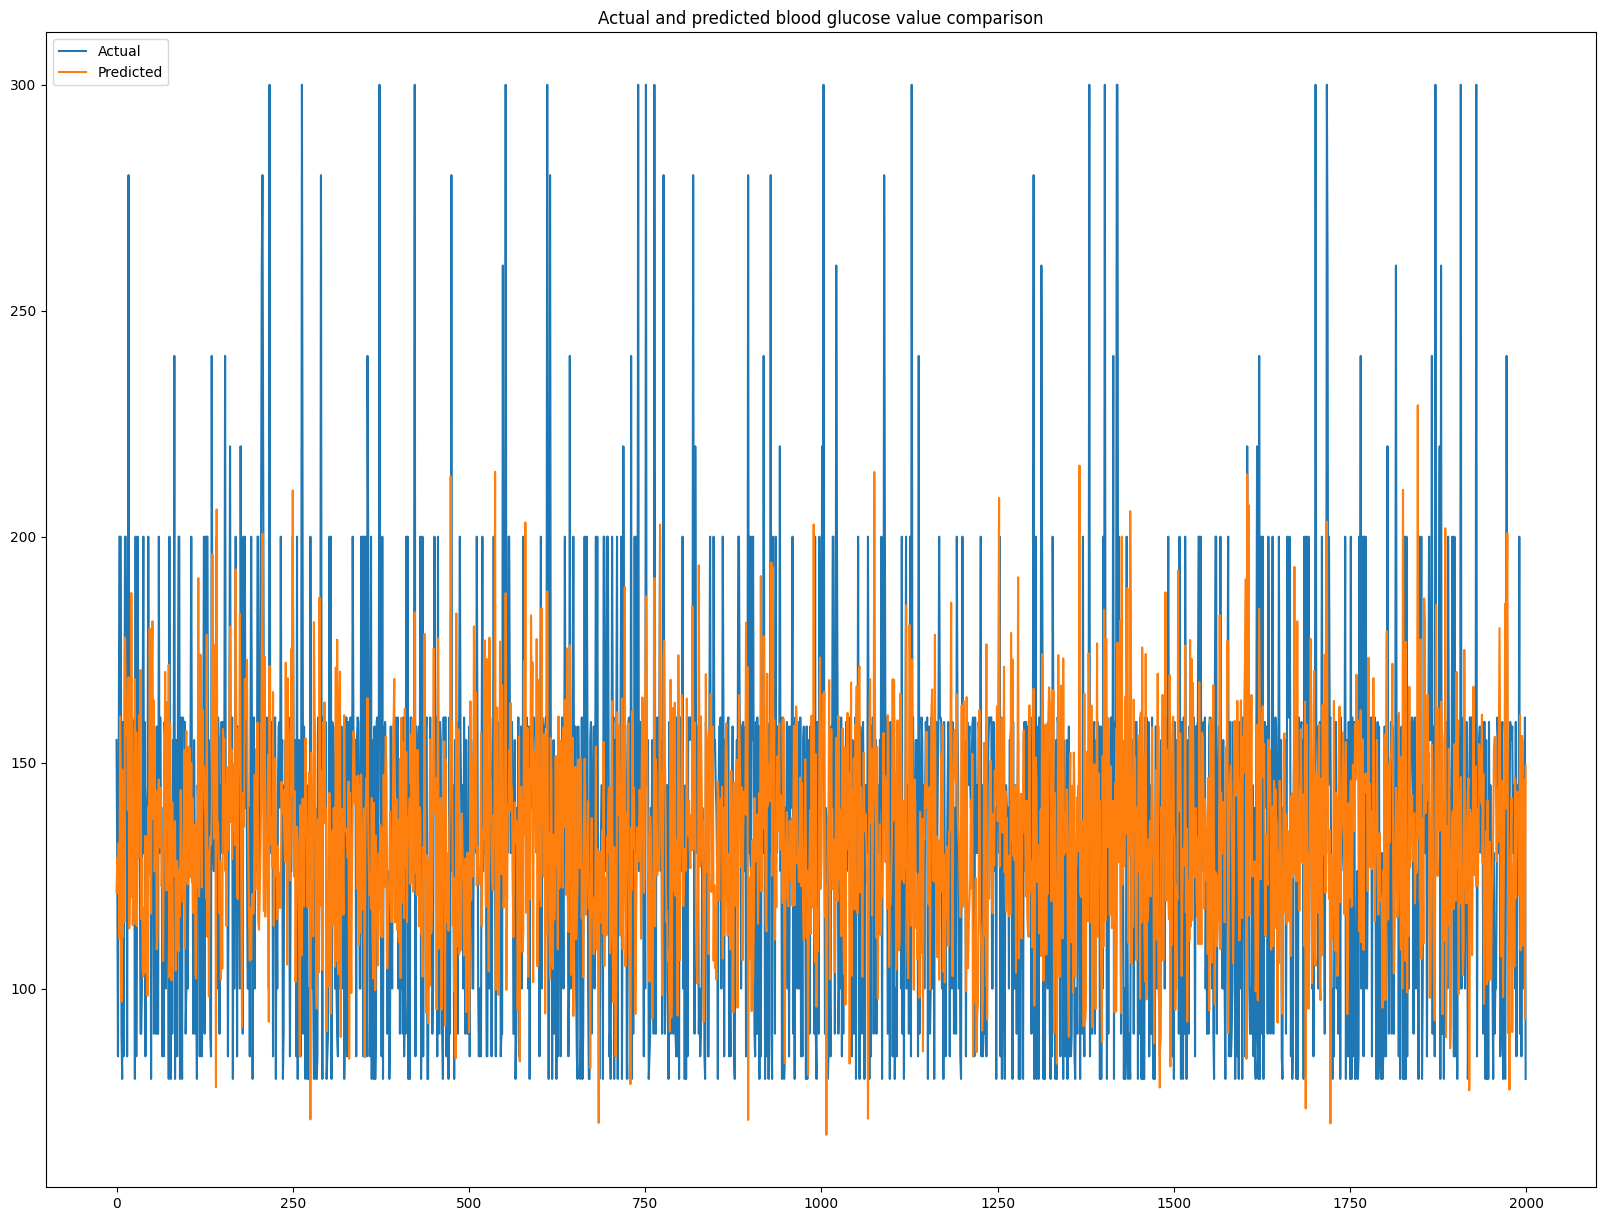

In [ ]:
plt.figure(figsize = (20,15))
plt.plot(y_test.values, label = 'Actual')
plt.plot(pred_fcnn, label = 'Predicted')
plt.title("Actual and predicted blood glucose value comparison")
plt.legend()
plt.show()

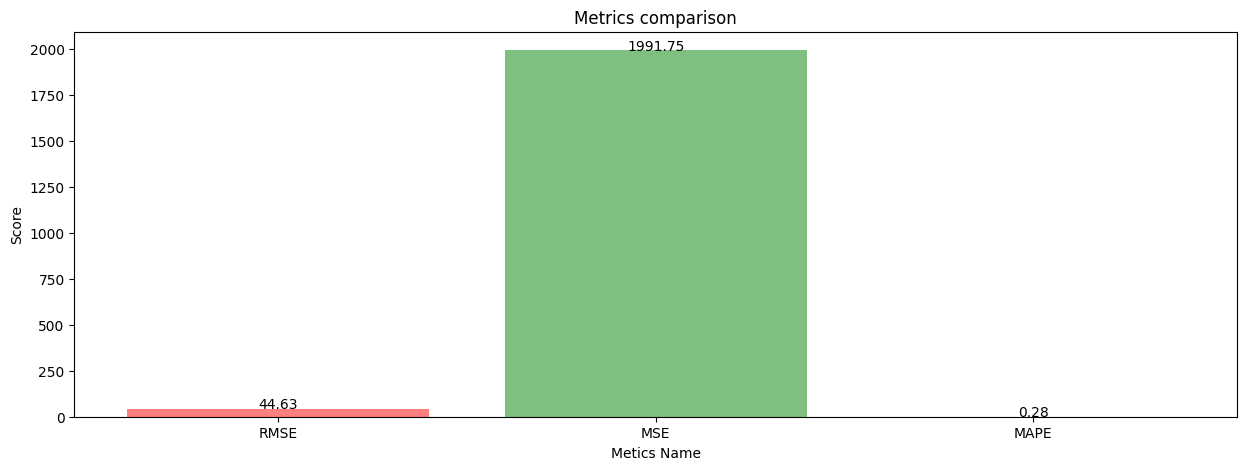

In [ ]:
Accuracy = [44.63,1991.75,0.28]
objects =  ('RMSE',"MSE",'MAPE')
y_pos = np.arange(len(objects))
plt.figure(figsize = (15,5))
plt.bar(y_pos, Accuracy, align='center', alpha=0.5,color = ['red', 'green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.xlabel('Metics Name')
plt.title('Metrics comparison')

# Insert data labels above each bar
for i, value in enumerate(Accuracy):
    plt.text(i, value+0.01, str(value), ha='center')
plt.show()


# Prediction

In [ ]:
test_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'diabetes', 'blood_glucose_level'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pickle
from keras.models import load_model
test_data = pd.read_csv("/content/gdrive/MyDrive/blood_glucose/glucose_test_data.csv")
test_df = test_data.sample(n=1)
print("Imput Data:",test_df)
test_df_data = test_df.iloc[:,:-1]
le_weight = pickle.load(open("/content/gdrive/MyDrive/blood_glucose/le_weight.p","rb"))
test_df_data["smoking_history"] = le_weight.transform(test_df_data["smoking_history"])
# Apply mapping to gender columns
map_col = {"Female":0,"Male":1}
test_df_data["gender"] =  test_df_data["gender"].map(map_col)
scaler_weight = pickle.load(open("/content/gdrive/MyDrive/blood_glucose/scaler_weight.p","rb"))
scaled_data = scaler_weight.transform(test_df_data.values)
model_weight = load_model("/content/gdrive/MyDrive/blood_glucose/gru_weight.h5")
prediction = model_weight.predict(scaled_data)[0]
print("predicted blood glucose level is:",prediction[0])

Imput Data:    gender   age  hypertension  heart_disease smoking_history    bmi  \
4  Female  58.0             0              0         No Info  30.37   

   HbA1c_level  diabetes  blood_glucose_level  
4          5.7         0                130.0  
1/1 [==============================] - 2s 2s/step
predicted blood glucose level is: 119.62277


# Backend integrate with front end

In [ ]:
!pip install pyngrok
!pip install flask-ngrok
!pip install flask-cors==3.0.7
!ngrok authtoken 2GiH8URoZbuvn0eIqW4C8br8caN_73m7xUQYdwzsqxo9Jo6EX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=7d36a48bebac42979232e6700120aa3ce3a4093ef50799fe5ca973d5f7406e8b
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import collections
collections.Iterable = collections.abc.Iterable

In [ ]:

from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import Flask, app,request
import json
import sys
from flask import jsonify
from flask_cors import CORS, cross_origin
import pickle
import warnings
from keras.models import load_model
warnings.filterwarnings("ignore")
app = Flask(__name__)
cors = CORS(app)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route('/glucose', methods=['GET','POST'])
# @cross_origin()
def login():
    result = input(request.values.get('uri'))
    return result
def input(uri):
    print("[INFO] loading model...")
    uri = uri.split(',')
    input_data = [i for i in uri]
    print(input_data)
    # Convert specific elements to integers
    for i in [1, 2, 3, 5, 6, 7]:
        if input_data[i]=="Yes":
            input_data[i] = 1
        elif input_data[i]=="NO":
            input_data[i] = 0
        else:
            input_data[i] = float(input_data[i])

    print(input_data)
    column = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'diabetes']
    df_test = pd.DataFrame([input_data],columns = column)
    le_weight = pickle.load(open("/content/gdrive/MyDrive/blood_glucose/le_weight.p","rb"))
    df_test["smoking_history"] = le_weight.transform(df_test["smoking_history"])
    # Apply mapping to gender columns
    map_col = {"Female":0,"Male":1}
    df_test["gender"] =  df_test["gender"].map(map_col)
    print(df_test)
    scaler_weight = pickle.load(open("/content/gdrive/MyDrive/blood_glucose/scaler_weight.p","rb"))
    scaled_data = scaler_weight.transform(df_test.values)
    model_weight = load_model("/content/gdrive/MyDrive/blood_glucose/gru_weight.h5")
    prediction = model_weight.predict(scaled_data)[0]

    return ({"data":str(prediction[0])})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://df43-35-193-129-91.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
[INFO] loading model...
['Female', '33', 'NO', 'NO', 'never', '27.32', '6.1', 'NO']
['Female', 33.0, 0, 0, 'never', 27.32, 6.1, 0]
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  33.0             0              0                4  27.32   

   HbA1c_level  diabetes  
0          6.1         0  
1/1 [==============================] - 1s 839ms/step


INFO:werkzeug:127.0.0.1 - - [30/Oct/2023 12:33:36] "POST /glucose HTTP/1.1" 200 -


[INFO] loading model...
['Female', '33', 'NO', 'NO', 'never', '27.32', '6.1', 'NO']
['Female', 33.0, 0, 0, 'never', 27.32, 6.1, 0]
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  33.0             0              0                4  27.32   

   HbA1c_level  diabetes  
0          6.1         0  
1/1 [==============================] - 1s 663ms/step


INFO:werkzeug:127.0.0.1 - - [30/Oct/2023 12:33:52] "POST /glucose HTTP/1.1" 200 -


[INFO] loading model...
['Male', '18', 'Yes', 'NO', 'never', '56.9', '26.9', 'NO']
['Male', 18.0, 1, 0, 'never', 56.9, 26.9, 0]
   gender   age  hypertension  heart_disease  smoking_history   bmi  \
0       1  18.0             1              0                4  56.9   

   HbA1c_level  diabetes  
0         26.9         0  
1/1 [==============================] - 1s 682ms/step


INFO:werkzeug:127.0.0.1 - - [30/Oct/2023 12:42:52] "POST /glucose HTTP/1.1" 200 -
